# Used Car Price Prediction



## Problem Statement
---------------------------

Develop a pricing model that can effectively predict the price of used cars and can help businesses in devising profitable strategies using differential pricing. In the process, determine which factors affect the prices of used cars. Conduct this analysis using an appropriate method for prediction of a numerical target variable. Generate a collection of insights and recommendations to help the business.

## Data Information
---------------------------
[Source - Kaggle](https://www.kaggle.com/datasets/goyalshalini93/car-data?select=CarPrice_Assignment.csv)

Variables(in order):
- **Car_ID -**(numerical variable): Car identifier.

- **Symboling -** (categorical variable): average degree of auto is more risky than its price indicates

- **CarName -** (categorical variable): models of different car makes

- **Fueltype -**  (categorical variable): type of fuel used (Gas or Diesel)

- **Aspiration-** (categorical variable): types of car engines (Std or Turbo)

- **Doornumber-** (categorical variable): the number of doors in the car(two or four)

- **Carbody-** (categorical variable): types of car body styles(convertible, hatchback,  sedan, wagon, hatchtop)

- **Drivewheel-** (categorical variable): drive mode (rwd, fwd, 4wd)

- **Enginelocation-** (categorical variable): engine installation location(front or rear)

- **Wheelbase-** (numerical variable): The horizontal distance between the centers of the front and rear wheels of the car

- **Carlength:-**(numerical variable): length of vehicle

- **Carwidth-** (numerical variable): width of vehicle

- **Carheight-** (numerical variable): height of vehicle

- **Curbweight-** (numerical variable): weight of vehicle

- **Enginetype-** (categorical variable): The type of engine or engines powering the vehicle. (dohc, dohcv, ohcv, ohc, ohcf,  rotor, l)

- **Cylindernumber-** (categorical variable): The number of cylinders of the engine(two, twelve, three, four, five, six, eight)

- **Enginesize-**  (numerical variable): The size of the engine

- **Fuelsystem-** (categorical variable): Fuel system of the engine(1bbl, 2bbl, 4bbl, idi, mfi, mpfi,  spdi, spfi)

- **Boreratio-** (numerical variable): The ratio between the size of the cylinder bore of an engine and its piston stroke length

- **Stroke-** (numerical variable): A phase of the engine's cycle

- **Compressionratio-** (numerical variable): The ratio of the cylinders and combustion chambers of an engine at their maximum and minimum values

- **Horsepower-** (numerical variable): The output power of the engine

- **Peakrpm-** (numerical variable): The engine's peak horsepower speed

- **Citympg-** (numerical variable): Fuel consumption in urban driving

- **Highwaympg-** (numerical variable): The fuel consumption of the car when driving on the open road

- **Price-** (numerical variable): The price of a car.
     
###  Source:
 Dataset from :https://www.kaggle.com/datasets/goyalshalini93/car-data


##Import the necessary libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

##Read in the data set using the code:

In [ ]:
import requests
import pandas as pd
from io import StringIO

orig_url="https://drive.google.com/file/d/1kSKi2XM0g3uURvzjNDqQX0NPYKCdTuqd/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
car = pd.read_csv(csv_raw, sep=",")

# Examine the first few lines of the data set using the method
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


The price of the cars indicated by the variable car is the target variable and the rest are the independent variables based on which we will predict car price.

# Pre Processing Data

## Printing information of the dataset to find missing values

In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Observation**

*   There are 205 non null variables and there are no missing valuesin the dataset.
*   This dataset has both numerical and catagorical variables



### Check for Unique values in each column

In [ ]:
#checking unique values in each column
car.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

**Observations**


*   Car_ID is an indentifier which is unique for each car in the dataset and can be dropped as it would not add any value to our analysis
*   CarName and Curbweight also have many unique values and can be dropped as they also do not add value








###Drop unwanted columns

In [ ]:
#Dropping the columns
car=car.drop(['car_ID','CarName', 'curbweight'],axis =1)

### Catagorizing numerical and catagorical values

In [ ]:
#Creating Numerical Values
num_cols=['wheelbase','carlength','carwidth','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm',
          'citympg','highwaympg','price']

In [ ]:
#Creating Catagorical Values
cat_cols=['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem' ]

#Exploratory Data Analysis (EDA)

## Univariate Analysis for Numerical Variables

In [ ]:
car[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00
horsepower,205.0,104.117073,39.544167,48.00,70.00,95.00,116.00,288.00
peakrpm,205.0,5125.121951,476.985643,4150.00,4800.00,5200.00,5500.00,6600.00
citympg,205.0,25.219512,6.542142,13.00,19.00,24.00,30.00,49.00


**Observations**

*   Price is the dependant variable and the other numerical varaibles are independant variables
*   The average fuel consumption in the city and Highway are around 25 miles and 30 miles, respectively.
*   The average peakrpm is about 5125 rpm.
*   The standard deviation of the price is greater than the mean value which indicate that there is abnormal distribution and the data is skewed. Hence we need to check the distributions of the data.



### Observing the Distribution of Numerical Variables

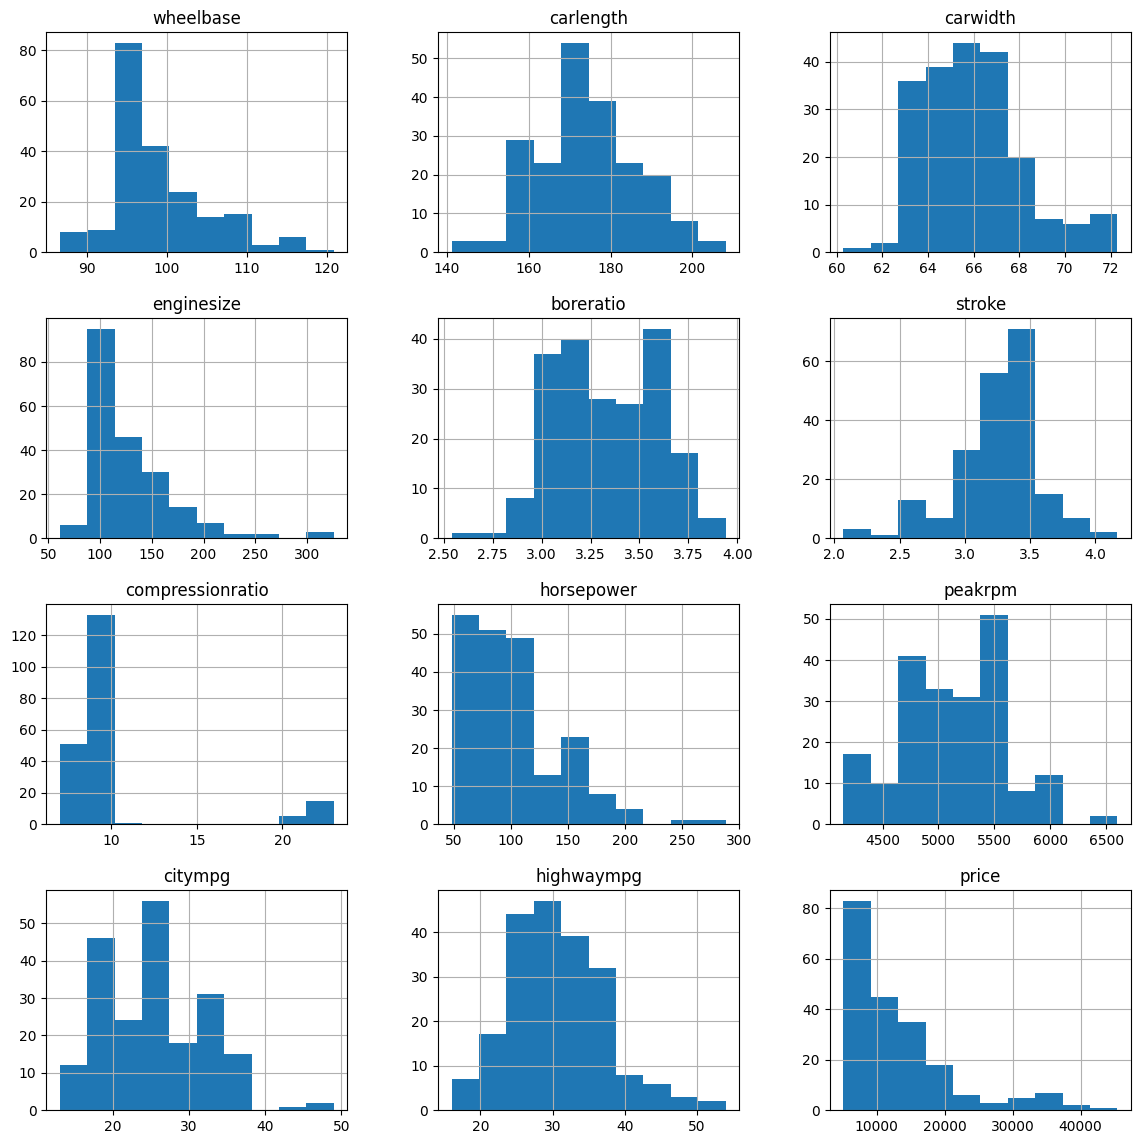

In [ ]:
car[num_cols].hist(figsize=(14,14))
plt.show()

**Observations**

*   **Wheelbase, carwidth,enginesize, citympg, highway mpg are Positively Skewed**
*   **Carlength has normal distribution**
*   **peakrpm is slightly left skewed**
*   **stroke and boreratio are negatively skewed**
*   **We see that the depedant variable *price* is highly right skewed and therefore we have to perform log transformation to get the normal distribution**.



### Log Transformation

In [ ]:
car['price_log']=np.log(car['price'])

Check to see if the skewness appears after log transformation

<Axes: xlabel='price_log', ylabel='Count'>

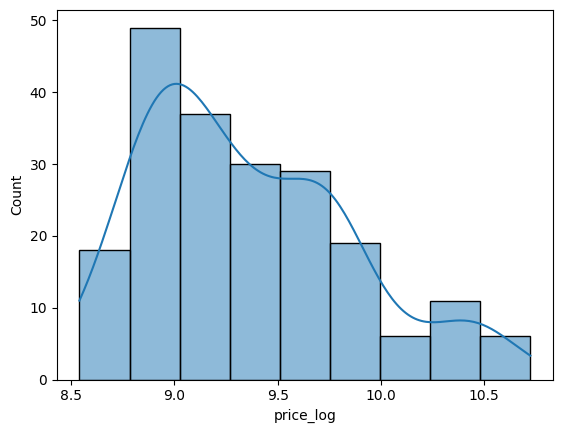

In [ ]:
sns.histplot(data=car,x='price_log', kde=True)

The log transformation variable 'price_log' appears to have a better normal distribution with slight skew but we can still proceed with our analysis

### Observing the Distribution of Catagorical Variables

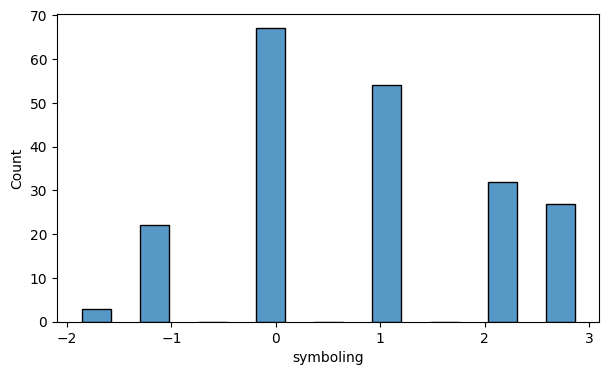

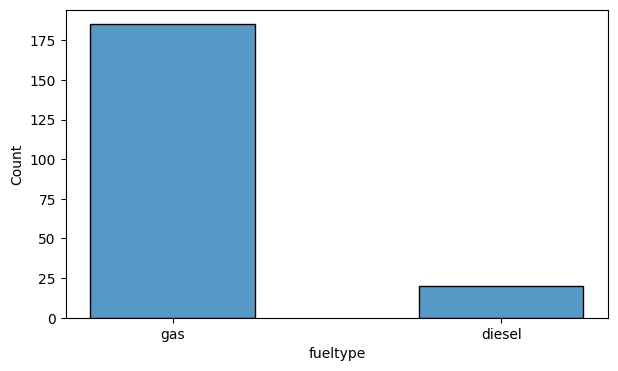

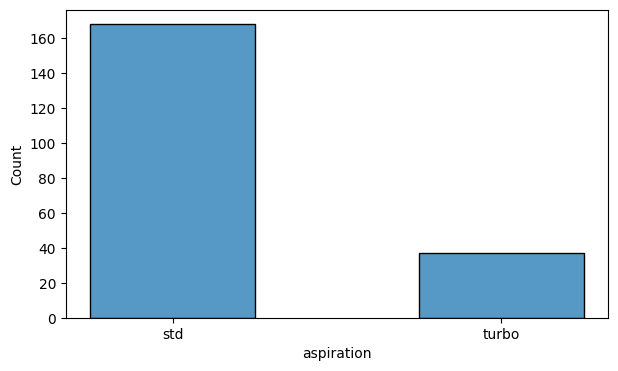

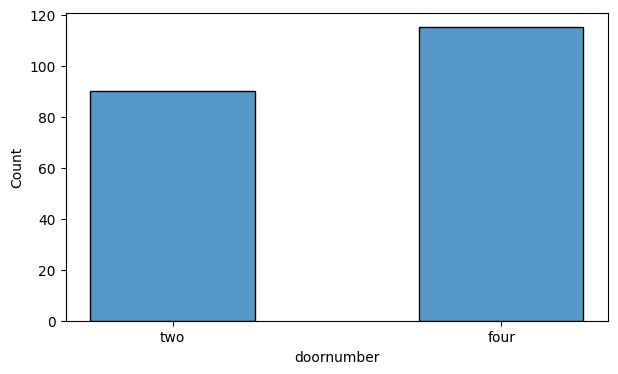

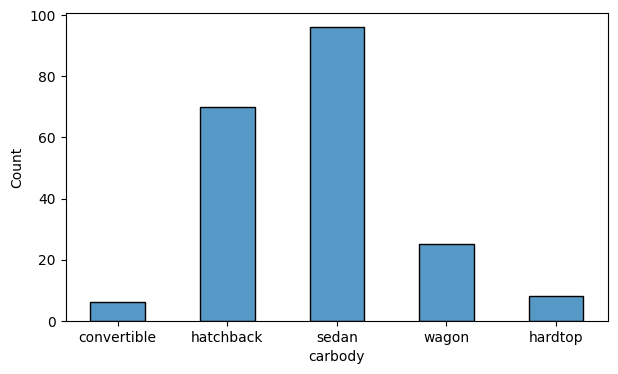

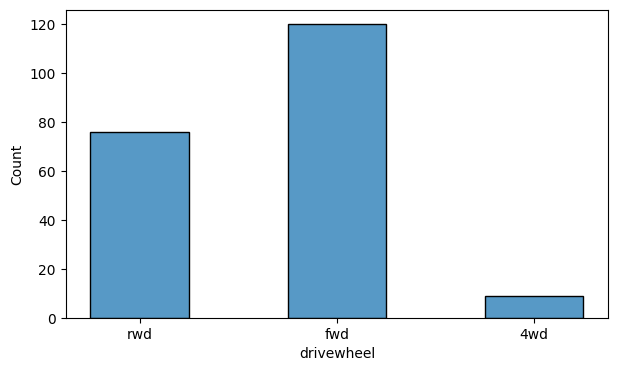

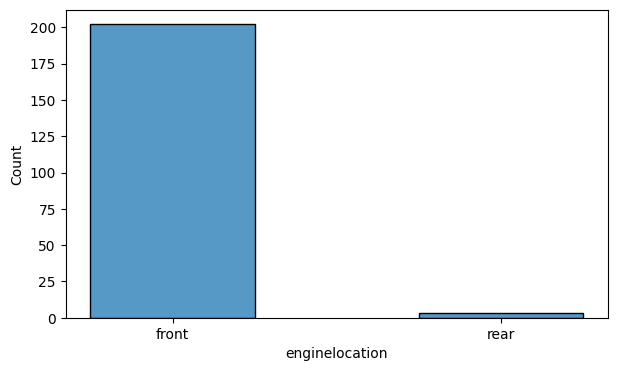

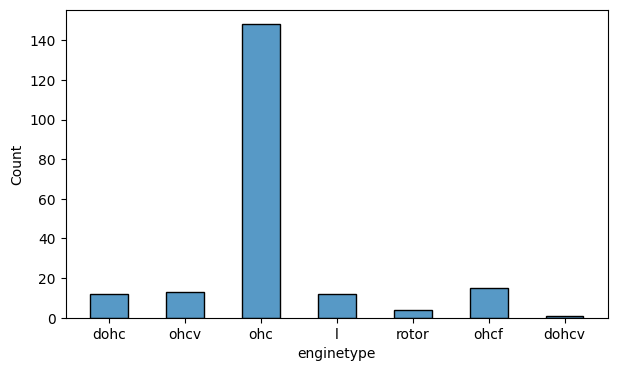

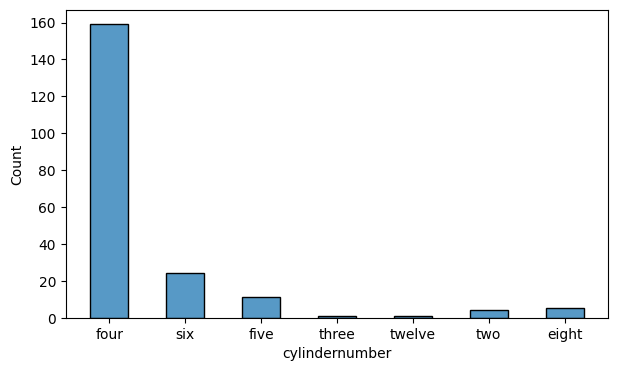

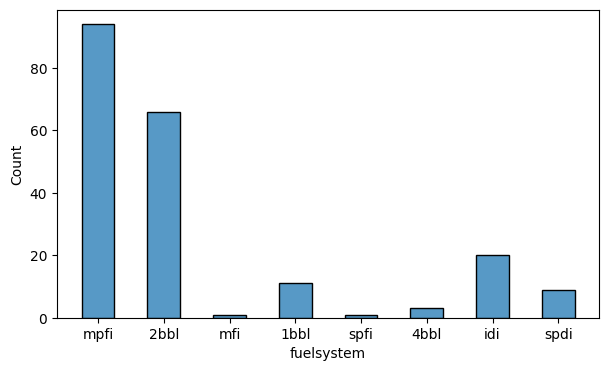

In [ ]:
## Creating Histogram for Catagorical Variables
for i in car[cat_cols]:
    plt.figure(figsize=(7,4))
    sns.histplot(data=car, x=i, kde = False, shrink=0.5)
    plt.show()

### Creating sub Catagories for each of the Catagory

In [ ]:
#Printing the % sub categories of each category
for i in cat_cols:
    print(car[i].value_counts(normalize=True))
    print('*'*40)

 0    0.326829
 1    0.263415
 2    0.156098
 3    0.131707
-1    0.107317
-2    0.014634
Name: symboling, dtype: float64
****************************************
gas       0.902439
diesel    0.097561
Name: fueltype, dtype: float64
****************************************
std      0.819512
turbo    0.180488
Name: aspiration, dtype: float64
****************************************
four    0.560976
two     0.439024
Name: doornumber, dtype: float64
****************************************
sedan          0.468293
hatchback      0.341463
wagon          0.121951
hardtop        0.039024
convertible    0.029268
Name: carbody, dtype: float64
****************************************
fwd    0.585366
rwd    0.370732
4wd    0.043902
Name: drivewheel, dtype: float64
****************************************
front    0.985366
rear     0.014634
Name: enginelocation, dtype: float64
****************************************
ohc      0.721951
ohcf     0.073171
ohcv     0.063415
dohc     0.058537
l        0

**Observations**

### Bivariate and MultiVaraite Analysis

Before we do the log transformation let's check the correlation using the heatmap

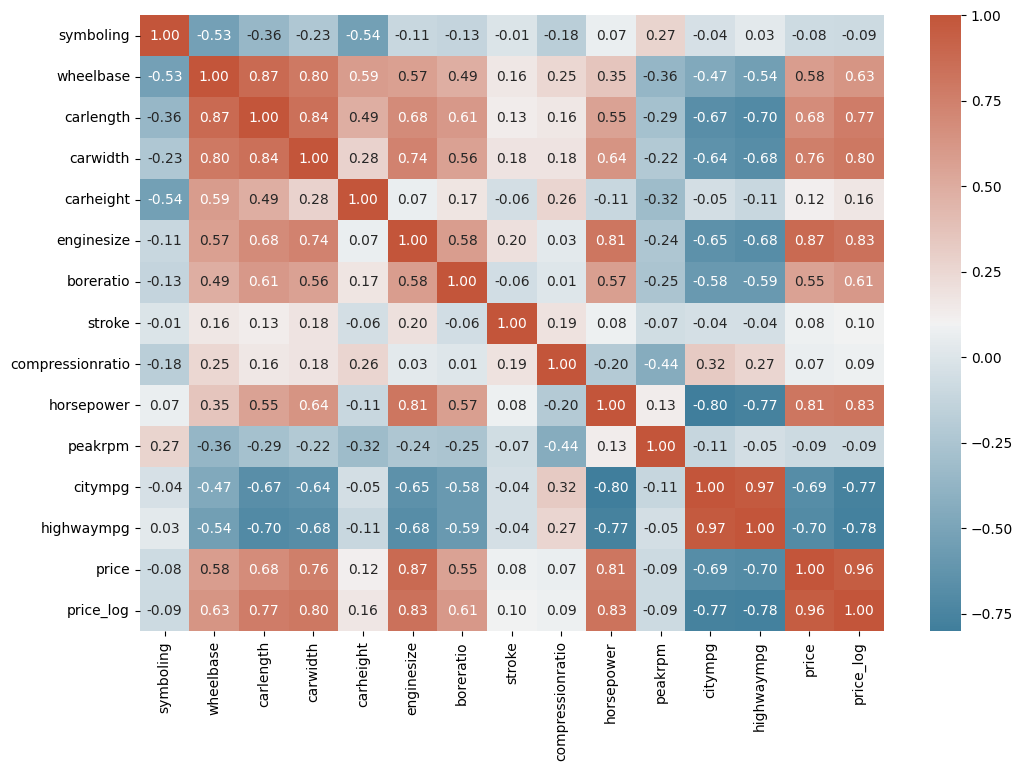

In [ ]:
plt.figure(figsize=(12,8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(car.corr(),annot=True,fmt='.2f',cmap=cmap )
plt.show()

**Observations**

**Positive Correlation is seen between:**

carlength and wheelbase
carwidth and carlength
carwidth and price
carwidth and highwaympg
enginesize and horsepower
enginesize and carwidth
enginesize and price
horsepower and price

They show that increase in these independant variables will show increase in the 'price' variable

**Negative Correlation:**
There are many variables with negative correlation seen in variables correlated mostly with symboling, peakrpm, stroke, citympg, highwaympg. They show that increase in these values will show a decrease in the depedant variable 'price'

There is negative correlation also seen between price and symboling, peakrpm, citympg, highwaympg




## Visualizing the relationship between price and other variables having significant correlations (> 0.7)

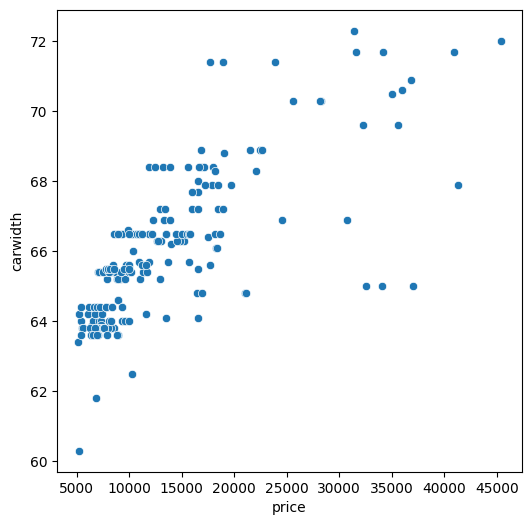

In [ ]:
# scatterplot to visualize the relationship between Price and carwidth
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='price', y='carwidth') #write you code here
plt.show()

**Observations:**
There is a positive association between price and carwidth. With increase in cardwidth increases price



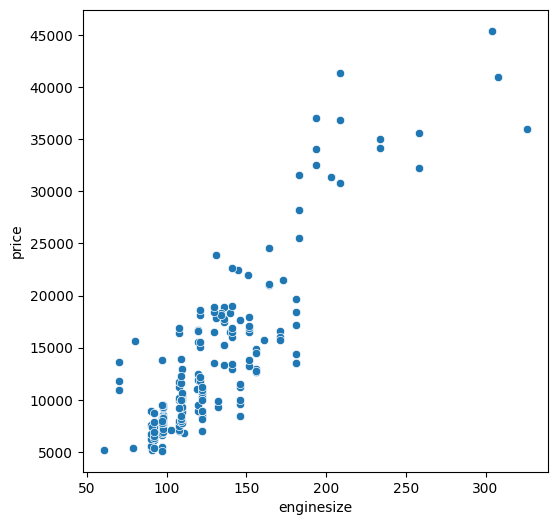

In [ ]:
# scatterplot to visualize the relationship between price and carlength
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='enginesize', y='price') #write you code here
plt.show()

**Observations:**
There is a positive association between price and enginesize.


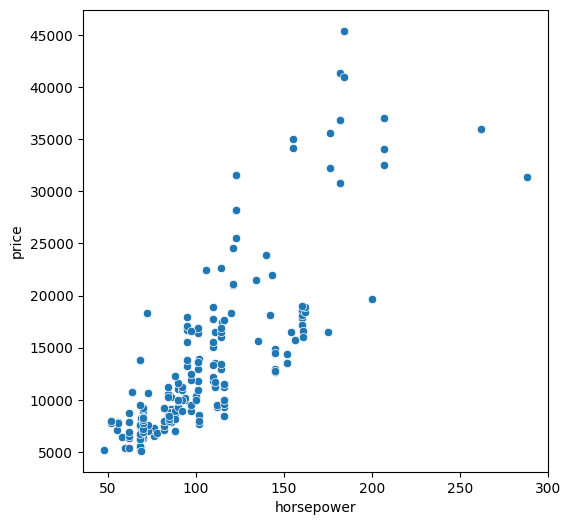

In [ ]:
# scatterplot to visualize the relationship between price and horsepower
plt.figure(figsize=(6, 6))
sns.scatterplot(data=car, x='horsepower', y='price') #write you code here
plt.show()

# Building Linear Regression model

### Preparing data for modeling

**Creating dummy variables for catagorical varaibales**

In [ ]:
#creating list of dummy columns
to_get_dummies_for = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem' ]

#Creating dummy variables
car=pd.get_dummies(data = car, columns= to_get_dummies_for, drop_first= True)

**Separating the indpendant variables from the dependant variable**

In [ ]:
#Separating target variable and other variables
Y= car['price_log']
X= car.drop(columns = ['price','price_log'])

##Scaling the data
The independent variables in this dataset have different scales. When features have differing scales from each other, there is a chance that a higher weightage will be given to features which have a higher magnitude, and they will dominate over other features whose magnitude changes may be smaller but whose percentage changes may be just as significant or even larger. This will impact the performance of our machine learning algorithm, and we do not want our algorithm to be biased towards one feature.

The solution to this issue is Feature Scaling, i.e. scaling the dataset so as to give every transformed variable a comparable scale.

In this problem, we will use the Standard Scaler method, which centers and scales the dataset using the Z-Score.

It standardizes features by subtracting the mean and scaling it to have unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples (zero) and s is the standard deviation of the training samples.

In [ ]:
#Scaling the data
sc=StandardScaler()
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

# add the intercept term
X = sm.add_constant(X_scaled)

## Splitting the data

In [ ]:
#Splitting the data into 70% train and 30% test set
X_train, X_test,y_train, y_test=train_test_split(X_scaled, Y, test_size=0.30, random_state=1)

We have to check for multicollinearity in the train dataset

## Check for Multicollinearity

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped/treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


In [ ]:
print(checking_vif(X_train))

                  feature         VIF
0               wheelbase   16.437476
1               carlength   16.335514
2                carwidth   14.074763
3               carheight    4.286840
4              enginesize   40.885333
5               boreratio    6.794367
6                  stroke    3.193187
7        compressionratio  192.439883
8              horsepower   39.485722
9                 peakrpm    4.288746
10                citympg   40.360045
11             highwaympg   36.562915
12           symboling_-1    6.917957
13            symboling_0   16.136860
14            symboling_1   15.634930
15            symboling_2    9.958738
16            symboling_3   13.678046
17           fueltype_gas         inf
18       aspiration_turbo    6.059883
19         doornumber_two    4.344990
20        carbody_hardtop    3.116415
21      carbody_hatchback   14.702935
22          carbody_sedan   21.033719
23          carbody_wagon   11.771580
24         drivewheel_fwd    9.814984
25         d

There are many variables with high VIF . We will drop the variables with VIF>5

**Drop the stastically insignificant columns from the training data and check if multicollinearity is removed**

In [ ]:
X = car.drop(columns={'wheelbase','carlength', 'price','carheight','enginesize','boreratio','symboling_-1','symboling_0','symboling_1','symboling_2', 'symboling_3','aspiration_turbo', 'boreratio','compressionratio','horsepower','carbody_hardtop','citympg','highwaympg', 'carbody_hatchback','carbody_sedan','carbody_wagon','drivewheel_fwd', 'drivewheel_rwd','enginelocation_rear','enginetype_dohcv','enginetype_ohc','enginetype_l','fueltype_gas', 'enginetype_dohcv', 'enginetype_rotor','cylindernumber_two','fuelsystem_4bbl','fuelsystem_idi','enginetype_ohcf','cylindernumber_five','cylindernumber_four','cylindernumber_six','cylindernumber_twelve', 'fuelsystem_2bbl','fuelsystem_mpfi','fuelsystem_spdi'})


In [ ]:
Y = car['price_log']

X = sm.add_constant(X)

#Model Adjustments

## Scaling the data again to achieve better model

In [ ]:
#Rescaling
X_scaled=sc.fit_transform(X)
X_scaled=pd.DataFrame(X_scaled, columns=X.columns)

#add constant to scaled data
X_scaled = sm.add_constant(X_scaled)

## Split the data again

In [ ]:
#Splitting again
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30 , random_state=1 )

### Checking for VIF

In [ ]:
#check for VIF
print(checking_vif(X_train))

                 feature       VIF
0                  const  0.000000
1                  const       NaN
2               carwidth  2.909266
3                 stroke  1.043283
4                peakrpm  1.099358
5              price_log  2.769235
6         doornumber_two  1.145613
7        enginetype_ohcv  1.213660
8   cylindernumber_three  0.023905
9         fuelsystem_mfi  0.023905
10       fuelsystem_spfi  1.015117


## Running the Model

In [ ]:
# create the model
model1 = sm.OLS(y_train,X_train).fit()

# get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.604e+28
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:46:11   Log-Likelihood:                 4326.3
No. Observations:                 143   AIC:                            -8637.
Df Residuals:                     135   BIC:                            -8613.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.2639   1.51e-15   6.12e+15      0.000       9.264       9.264
const                -3.867e-16   5.75e-31  -6.72e+14      0.000   -3.87e-16   -3.87e-16
carwidth             -3.969e-15   2.56e-15     -1.549      0.124   -9.04e-15     1.1e-15
stroke               -4.177e-15   1.54e-15     -2.718      0.007   -7.22e-15   -1.14e-15
peakrpm                7.91e-15   1.65e-15      4.785      0.000    4.64e-15    1.12e-14
price_log                0.5026    2.5e-15   2.01e+14      0.000       0.503       0.503
doornumber_two        1.038e-14   1.64e-15      6.346      0.000    7.15e-15    1.36e-14
enginetype_ohcv       6.217e-15   1.59e-15      3.906      0.000    3.07e-15    9.37e-15
cylindernumber_three    -0.6486   1.06e-16  -6.12e+15      0.000      -0.649      -0.649
fuelsystem_mfi          -0.6486   1.06e-16  -6.12e+15      0.000      -0.649      -0.649
fuelsystem_spfi      -3.414e-15   1.27e-15     -2.680      0.008   -5.93e-15   -8.95e-16
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                1.283
Skew:                          -0.135   Prob(JB):                        0.526
Kurtosis:                       2.623   Cond. No.                     2.49e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.92e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Now check with test data

In [ ]:
# create the model
model2= sm.OLS(y_test,X_test).fit()
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.387e+28
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        22:46:11   Log-Likelihood:                 1906.5
No. Observations:                  62   AIC:                            -3795.
Df Residuals:                      53   BIC:                            -3776.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    9.3090   1.56e-15   5.98e+15      0.000       9.309       9.309
const                 2.802e-16   9.42e-31   2.97e+14      0.000     2.8e-16     2.8e-16
carwidth              9.437e-16   3.59e-15      0.263      0.794   -6.26e-15    8.14e-15
stroke               -6.758e-15   1.74e-15     -3.887      0.000   -1.02e-14   -3.27e-15
peakrpm                4.58e-16   1.58e-15      0.290      0.773   -2.71e-15    3.63e-15
price_log                0.5026   2.99e-15   1.68e+14      0.000       0.503       0.503
doornumber_two       -2.325e-15    1.6e-15     -1.450      0.153   -5.54e-15    8.91e-16
enginetype_ohcv       1.596e-15   1.81e-15      0.880      0.383   -2.04e-15    5.23e-15
cylindernumber_three  1.813e-15   8.95e-16      2.025      0.048    1.74e-17    3.61e-15
fuelsystem_mfi        2.762e-15   8.48e-16      3.258      0.002    1.06e-15    4.46e-15
fuelsystem_spfi         -0.6518   1.09e-16  -5.98e+15      0.000      -0.652      -0.652
==============================================================================
Omnibus:                       10.247   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.261
Skew:                          -0.969   Prob(JB):                      0.00591
Kurtosis:                       3.462   Cond. No.                     5.49e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.67e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Linear Regression Assumptions

### Mean Residual

In [ ]:
residuals = model2.resid

# Write your code here
residuals.mean()

6.6756636061332e-15

The mean of residuals is 0

#### Homoscedasticity

We are testing for whether the model is homoscedasticity or heteroscedasticity.


In [ ]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [ ]:
##import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 1.9709604005461994), ('p-value', 0.003638272485829667)]

The p-value is extremely small there for we reject the premise that the residuals are homoskedastic and conclude that there is in fact heteroskedasitcity present in the residuals. This means that the residuals do not have a constant variance.

#### Linearity of variables

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

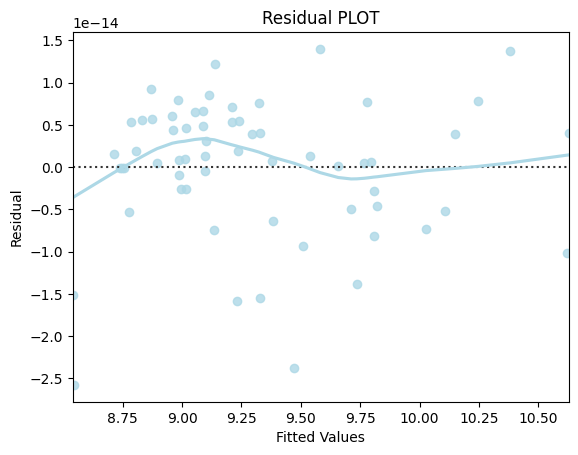

In [ ]:
# predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color="lightblue", lowess=True) #write your code here
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

#### Normality of error terms
The residuals should be normally distributed.

<Axes: ylabel='Count'>

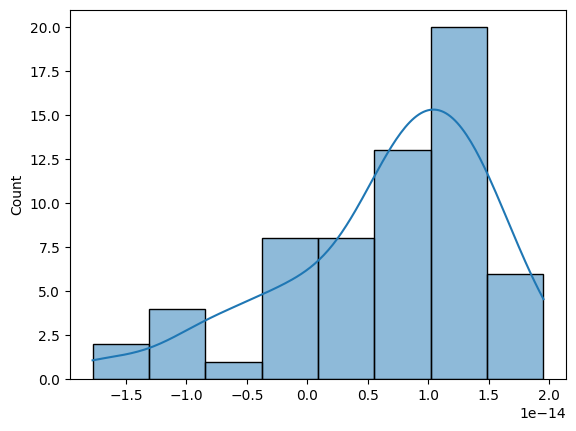

In [ ]:
# Plot histogram of residuals
#write your code here
sns.histplot(residuals, kde=True)

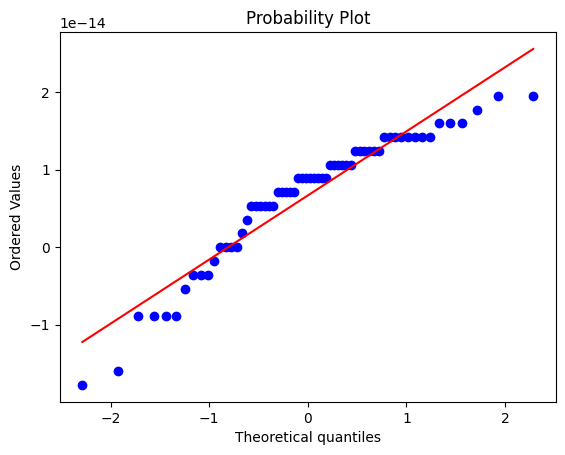

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
plt.show()

**Observations**

The histogram and the normal probability plot show some evidence that the residuals are right skewed.

## Linear Regression Model
We are now going to test our regression model to predict the price

In [ ]:
coef = model2.params #write your code here
out=pd.DataFrame(coef[:-2], columns=['Coefficients'])
out

,Coefficients
const,9.309047e+00
const,2.801999e-16
carwidth,9.436896e-16
stroke,-6.758483e-15
peakrpm,4.579670e-16
price_log,5.025749e-01
doornumber_two,-2.324529e-15
enginetype_ohcv,1.595946e-15
cylindernumber_three,1.812786e-15


These are the coefficients. Meaning that when given the numerical/categorical information for each feature, we can multiply each one by its coefficient and add them all up to find the price.

##Equation Function

In [ ]:
Equation = "log (Price) ="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) =	( 9.309046517476263 ) *  const + ( 2.801999163114328e-16 ) *  const + ( 9.43689570931383e-16 ) *  carwidth + ( -6.7584826624056404e-15 ) *  stroke + ( 4.579669976578771e-16 ) *  peakrpm + ( 0.5025749151365075 ) *  price_log + ( -2.3245294578089215e-15 ) *  doornumber_two + ( 1.5959455978986625e-15 ) *  enginetype_ohcv + ( 1.8127860323957634e-15 ) *  cylindernumber_three + ( 2.761679773755077e-15 ) *  fuelsystem_mfi + ( -0.6517636219856167 ) *  fuelsystem_spfi + 

## Model Accuracy

In [ ]:
# Note that "accuracy" is not a typical term used for regression models, but we can interpret R-squared as a measure of model fit.

train_r_squared = 0.897
test_r_squared = 0.934

# Calculate "accuracy" as the square root of R-squared (pseudo-R-squared)

train_accuracy = train_r_squared ** 0.5
test_accuracy = test_r_squared ** 0.5

print(f"Train model accuracy (pseudo-R-squared): {train_accuracy:.3f}")
print(f"Test model accuracy (pseudo-R-squared): {test_accuracy:.3f}")


Train model accuracy (pseudo-R-squared): 0.947
Test model accuracy (pseudo-R-squared): 0.966


##conclusions and business recommendations derived from the model

There are several variables that affect the price of used car. From the model, we can say recommend businesses that they can sell the car at a higher price when the following conditions are met: When the car width is more, has higher peakrpm and uses cylinder number 3 and preferably has an engine type of ohcv.



# Recommendation

We can predict the factors or varaibles that affect the price of a used car based on our predicted as well as actual values based on our model